# Matplotlib, Seaborn, and Pandas

`Matplotlib`, `Seaborn`, and `Pandas` are two very popular scientific libraries  

`Matplotlib` is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.  
`Seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.  
`Pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

## Index

* [Matplotlib](matplotlib_pandas.ipynb#Matplotlib)
* [Seaborn](matplotlib_pandas.ipynb#Seaborn)
* [Pandas](matplotlib_pandas.ipynb#Pandas)
    * [Create a DataFrame](matplotlib_pandas.ipynb#Create-a-DataFrame)
    * [Read a file in pandas](matplotlib_pandas.ipynb#Read-a-file-in-pandas)
    * [Operations on a column](matplotlib_pandas.ipynb#Operations-on-a-column)
    * [Operations on a row (or column)](matplotlib_pandas.ipynb#Operations-on-a-row)
    * [Add a column to a DataFrame](matplotlib_pandas.ipynb#Add-a-column-to-a-DataFrame)
    * [Remove a column](matplotlib_pandas.ipynb#Remove-a-column)
    * [Filter a DataFrame](matplotlib_pandas.ipynb#Filter-a-DataFrame)
    * [Save the DataFrame to a file](matplotlib_pandas.ipynb#Save-the-DataFrame-to-a-file)
    * [Create plots with Pandas](matplotlib_pandas.ipynb#Create-plots-with-Pandas)
    * [Other useful pandas methods](matplotlib_pandas.ipynb#Other-useful-pandas-methods)

## Matplotlib
[back to top](matplotlib_pandas.ipynb#Index)

The most convenient way to use matplotlib in a jupyter environment is to import the library in this way:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

This allow to display the generated plots directly in the notebook

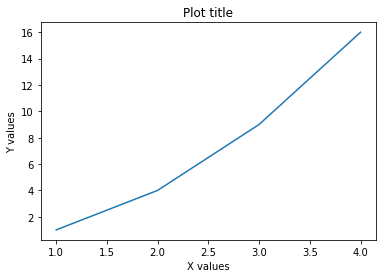

In [2]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
plt.plot(x, y)
plt.title('Plot title')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

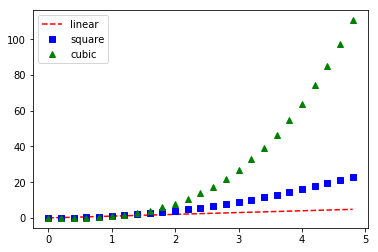

In [3]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0, 5, 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', label='linear') 
plt.plot(t, t ** 2, 'bs', label='square')
plt.plot(t, t ** 3, 'g^', label='cubic')

plt.legend()
plt.show()

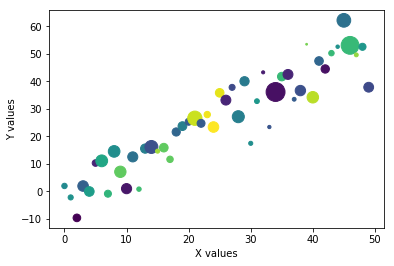

In [4]:
x = np.arange(50)
y = x + 10 * np.random.randn(50)
color = np.random.randint(0, 50, 50)
size = np.abs(np.random.randn(50)) * 100

plt.scatter(x, y, c=color, s=size)
plt.xlabel('X values')
plt.ylabel('Y values')

plt.show()

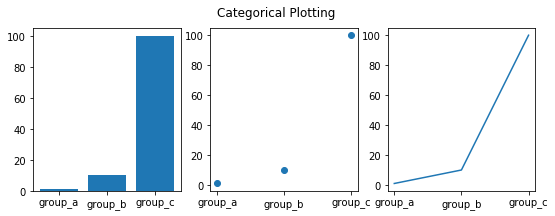

In [5]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)

plt.suptitle('Categorical Plotting')
plt.show()

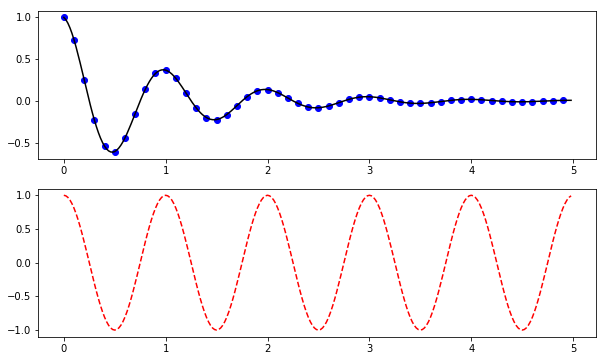

In [6]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(figsize=(10, 6))

ax0 = plt.subplot2grid((2, 1), (0, 0))
ax1 = plt.subplot2grid((2, 1), (1, 0))

ax0.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
ax1.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.show()

There are different types of histograms: `bar`, `barstacked`, `step`, and `stepfilled`

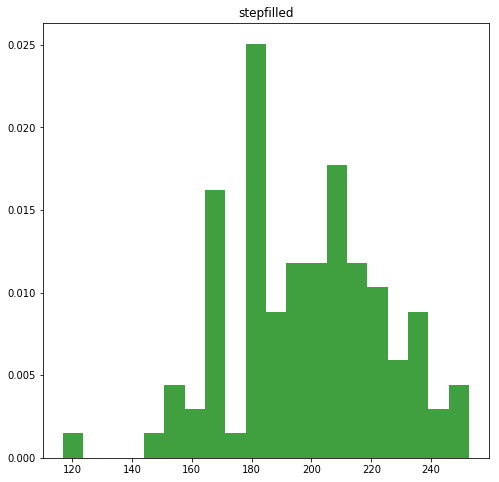

In [7]:
mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)

fig = plt.figure(figsize=(8, 8))

n, bins, patches = plt.hist(x, 20, density=True, histtype='stepfilled', facecolor='g', alpha=0.75)
plt.title('stepfilled')

plt.show()

## Seaborn
[back to top](matplotlib_pandas.ipynb#Index)

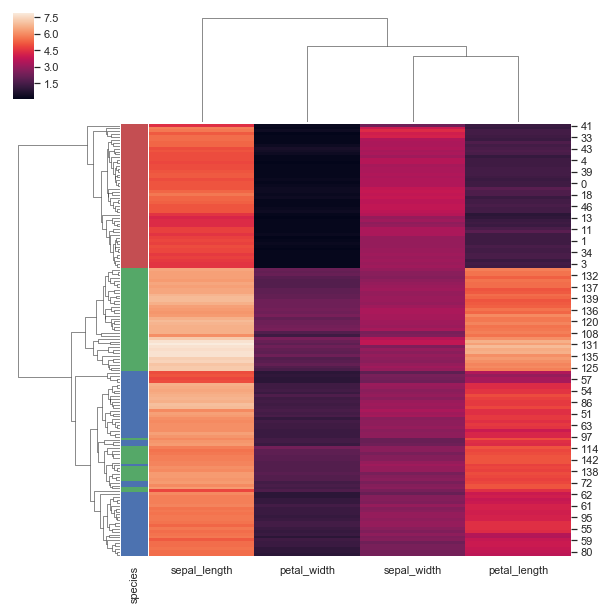

In [8]:
import seaborn as sns

sns.set(color_codes=True)

# Load a dataset
iris = sns.load_dataset("iris")

# Remove from the dataset the column 'species'
species = iris.pop("species")

# Assign each specie a color
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)

# Plot the clustermap
g = sns.clustermap(iris, row_colors=row_colors)

## Pandas
[back to top](matplotlib_pandas.ipynb#Index)

In [9]:
import pandas as pd

### Create a DataFrame
[back to top](matplotlib_pandas.ipynb#Index)

In [10]:
df = pd.DataFrame({
    'a': range(10),
    'b': np.arange(0, 1, 0.1),
    'c': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'l'],
    'd': [True, True, False, False, True, True, True, False, False, True]
})

In [11]:
df

,a,b,c,d
0,0,0.0,a,True
1,1,0.1,b,True
2,2,0.2,c,False
3,3,0.3,d,False
4,4,0.4,e,True
5,5,0.5,f,True
6,6,0.6,g,True
7,7,0.7,h,False
8,8,0.8,i,False
9,9,0.9,l,True


In [12]:
df.head()

,a,b,c,d
0,0,0.0,a,True
1,1,0.1,b,True
2,2,0.2,c,False
3,3,0.3,d,False
4,4,0.4,e,True


In [13]:
df.tail()

,a,b,c,d
5,5,0.5,f,True
6,6,0.6,g,True
7,7,0.7,h,False
8,8,0.8,i,False
9,9,0.9,l,True


In [14]:
df.shape

(10, 4)

Rows and columns can be accessed as follow:

In [15]:
df['a']

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: a, dtype: int64

In [16]:
df.loc[2]

a        2
b      0.2
c        c
d    False
Name: 2, dtype: object

Each column has a data-type:

In [17]:
df.dtypes

a      int64
b    float64
c     object
d       bool
dtype: object

We can force a column to be a different compatible data-type:

In [18]:
df['a'] = df['a'].astype('float')

In [19]:
df.head()

,a,b,c,d
0,0.0,0.0,a,True
1,1.0,0.1,b,True
2,2.0,0.2,c,False
3,3.0,0.3,d,False
4,4.0,0.4,e,True


In [20]:
df.dtypes

a    float64
b    float64
c     object
d       bool
dtype: object

### Read a file in pandas
[back to top](matplotlib_pandas.ipynb#Index)

In [21]:
df = pd.read_csv('../data/yeast_genes_chrom2.txt', sep='\t', header=0)

In [22]:
df.shape

(40, 4)

In [23]:
df.head(3)

,Gene_name,Chromosome,Start,Stop
0,PAU9,2,7733,7605
1,SRO77,2,13879,10847
2,PKC1,2,17696,14241


In [24]:
df.dtypes

Gene_name     object
Chromosome     int64
Start          int64
Stop           int64
dtype: object

### Operations on a column
[back to top](matplotlib_pandas.ipynb#Index)

In [25]:
df['Chromosome'] += 1

In [26]:
df.head(3)

,Gene_name,Chromosome,Start,Stop
0,PAU9,3,7733,7605
1,SRO77,3,13879,10847
2,PKC1,3,17696,14241


### Operations on a row
[back to top](matplotlib_pandas.ipynb#Index)

We can use the function `apply` to execute an operation to all the rows (or columns) of a DataFrame  
The syntax is the following
```
    dataframe.apply(function, axis)
```
where __axis__ can be **0** (apply the function to each column) or __1__ (apply the function to each row)

In [27]:
# First, I define the function to be apllied to each row

def gene_length(row):
    """Calculate the length of each gene
    
    :param row: DataFrame row
    :return: int, length of the gene
    """
    
    length = row['Stop'] - row['Start']
    return abs(length)

In [28]:
# Now apply the function to the dataframe

df['Length'] = df.apply(gene_length, axis=1)

In [29]:
df.head()

,Gene_name,Chromosome,Start,Stop,Length
0,PAU9,3,7733,7605,128
1,SRO77,3,13879,10847,3032
2,PKC1,3,17696,14241,3455
3,RTG3,3,23535,22075,1460
4,SFT2,3,24098,24745,647


In [30]:
# Now I define the function to be apllied to each column

def average_length(column):
    """Calculate the average length of the elements of a column
    
    :param column: DataFrame column
    :return: float, average length of the elements of a column
    """
    
    elements = [len(str(i)) for i in column]
    return np.mean(elements)

In [31]:
# Example of applying a function to each column

df.apply(average_length, axis=0)

Gene_name     4.375
Chromosome    1.000
Start         5.200
Stop          5.175
Length        3.650
dtype: float64

### Add a column to a DataFrame
[back to top](matplotlib_pandas.ipynb#Index)

In [32]:
def derive_strand(line):
    """Derive the strand of genomic coordinates
    
    :param line: line of a pandas DataFrame
    :return: string, strand of the gene
    """
    
    if line['Start'] < line['Stop']:
        return '+'
    else:
        return '-'

In [33]:
df['Strand'] = df.apply(derive_strand, axis=1)

In [34]:
df.head(10)

,Gene_name,Chromosome,Start,Stop,Length,Strand
0,PAU9,3,7733,7605,128,-
1,SRO77,3,13879,10847,3032,-
2,PKC1,3,17696,14241,3455,-
3,RTG3,3,23535,22075,1460,-
4,SFT2,3,24098,24745,647,+
5,ECM21,3,28299,24946,3353,-
6,ATP1,3,37050,38687,1637,+
7,BNA4,3,39142,40524,1382,+
8,BRN1,3,40828,43092,2264,+
9,ROX3,3,44915,44253,662,-


### Remove a column
[back to top](matplotlib_pandas.ipynb#Index)

In [35]:
df['Chromosome'].unique()

array([3])

In [36]:
del df['Chromosome']

In [37]:
df.head(3)

,Gene_name,Start,Stop,Length,Strand
0,PAU9,7733,7605,128,-
1,SRO77,13879,10847,3032,-
2,PKC1,17696,14241,3455,-


### Filter a DataFrame
[back to top](matplotlib_pandas.ipynb#Index)

In [38]:
df[df['Strand'] == '+'].head()

,Gene_name,Start,Stop,Length,Strand
4,SFT2,24098,24745,647,+
6,ATP1,37050,38687,1637,+
7,BNA4,39142,40524,1382,+
8,BRN1,40828,43092,2264,+
10,RPL32,45975,46367,392,+


In [39]:
df[(df['Strand'] == '+') & (df['Length'] < 600)]

,Gene_name,Start,Stop,Length,Strand
10,RPL32,45975,46367,392,+
13,MRP21,48822,49355,533,+
27,KTI11,89976,90224,248,+


### Save the DataFrame to a file
[back to top](matplotlib_pandas.ipynb#Index)

In [40]:
df.to_csv('../data/yeast_genes_chrom2_strand.txt', sep='\t', header=True, index=False)

### Create plots with Pandas
[back to top](matplotlib_pandas.ipynb#Index)

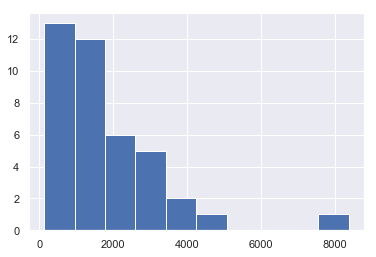

In [41]:
df['Length'].hist()

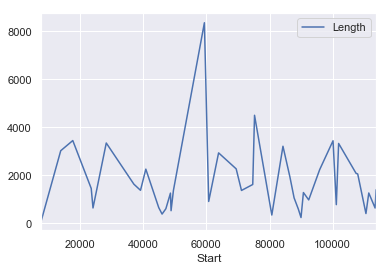

In [42]:
df.plot(x='Start', y='Length')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


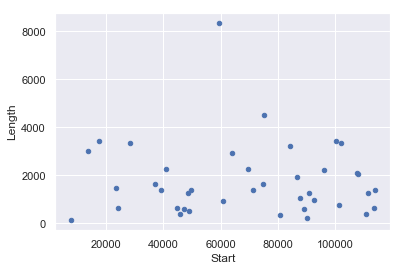

In [43]:
df.plot(x='Start', y='Length', kind='scatter')

### Other useful pandas methods
[back to top](matplotlib_pandas.ipynb#Index)

#### **.tolist()**

In [44]:
df[:5]['Gene_name']

0     PAU9
1    SRO77
2     PKC1
3     RTG3
4     SFT2
Name: Gene_name, dtype: object

In [45]:
df[:5]['Gene_name'].tolist()

['PAU9', 'SRO77', 'PKC1', 'RTG3', 'SFT2']

#### **.describe()**

In [46]:
df.describe()

,Start,Stop,Length
count,40.000000,40.000000,40.000000
mean,68922.425000,68445.950000,1790.425000
std,31262.570642,31664.700999,1523.945266
min,7733.000000,7605.000000,128.000000
25%,45710.000000,45838.500000,658.250000
50%,72908.000000,71407.500000,1380.500000
75%,93280.000000,93456.500000,2267.000000
max,113765.000000,115171.000000,8363.000000


#### **.mean()**

In [47]:
df['Length'].mean()

1790.425

#### **.std()**

In [48]:
df['Length'].std()

1523.9452659849528

#### **.isna()** and __.dropna()__

In [49]:
new_df = df.head()

In [50]:
new_df.loc[1, 'Length'] = np.nan
new_df.loc[3, 'Strand'] = np.nan

/home/loris/.virtualenvs/masterub/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [51]:
new_df

,Gene_name,Start,Stop,Length,Strand
0,PAU9,7733,7605,128.0,-
1,SRO77,13879,10847,NaN,-
2,PKC1,17696,14241,3455.0,-
3,RTG3,23535,22075,1460.0,NaN
4,SFT2,24098,24745,647.0,+


In [52]:
new_df.isna()

,Gene_name,Start,Stop,Length,Strand
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,False


In [53]:
new_df.dropna()

,Gene_name,Start,Stop,Length,Strand
0,PAU9,7733,7605,128.0,-
2,PKC1,17696,14241,3455.0,-
4,SFT2,24098,24745,647.0,+


#### **.pivot_table()**

In [54]:
new_df

,Gene_name,Start,Stop,Length,Strand
0,PAU9,7733,7605,128.0,-
1,SRO77,13879,10847,NaN,-
2,PKC1,17696,14241,3455.0,-
3,RTG3,23535,22075,1460.0,NaN
4,SFT2,24098,24745,647.0,+


In [55]:
new_df.pivot_table(new_df, index=['Gene_name', 'Strand'])

,,Length,Start,Stop
Gene_name,Strand,,,
PAU9,-,128.0,7733,7605
PKC1,-,3455.0,17696,14241
SFT2,+,647.0,24098,24745
SRO77,-,NaN,13879,10847


#### **.T**

In [56]:
new_df

,Gene_name,Start,Stop,Length,Strand
0,PAU9,7733,7605,128.0,-
1,SRO77,13879,10847,NaN,-
2,PKC1,17696,14241,3455.0,-
3,RTG3,23535,22075,1460.0,NaN
4,SFT2,24098,24745,647.0,+


In [57]:
new_df.T

,0,1,2,3,4
Gene_name,PAU9,SRO77,PKC1,RTG3,SFT2
Start,7733,13879,17696,23535,24098
Stop,7605,10847,14241,22075,24745
Length,128,NaN,3455,1460,647
Strand,-,-,-,NaN,+


#### **.value_counts()**

In [58]:
df['Strand'].value_counts()

-    23
+    16
Name: Strand, dtype: int64